### Import Packages

In [1]:
# Import packages
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sci-Kit Learn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Import module
from lib.cluster import kmeans, find_best_cluster, feature_importance, plot_kmeans_cluster

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Import Data

In [2]:
file_loc = "data/stats_14-17.csv"

In [3]:
data = pd.read_csv(file_loc)
data

,Unnamed: 0,Status,Player,Pos,Player_ID,url,G,MP,PER,TS%,...,DRB_100,TRB_100,AST_100,STL_100,BLK_100,TOV_100,PF_100,PTS_100,ORtg,DRtg
0,0,Inactive,A.J. Price,PG,priceaj01,file:///Users/alexcheng/Downloads/us.sitesucke...,261,3929,12.2,0.486,...,4.0,4.9,7.4,1.6,0.1,3.0,3.1,19.8,100,108
1,1,Active,Aaron Brooks,PG,brookaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,594,13016,13.5,0.525,...,3.2,4.1,7.4,1.4,0.3,3.8,4.6,24.0,104,110
2,2,Active,Aaron Gordon,SF,gordoaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,182,4238,14.3,0.522,...,7.9,11.2,3.2,1.4,1.2,2.0,4.2,18.9,107,108
3,3,Active,Aaron Harrison,SG,harriaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,26,110,3.3,0.326,...,6.4,8.2,2.3,2.7,0.0,1.8,5.5,8.7,73,104
4,4,Active,Adreian Payne,PF,paynead01,file:///Users/alexcheng/Downloads/us.sitesucke...,96,1317,7.4,0.444,...,8.4,11.3,2.4,1.5,0.9,3.3,7.2,15.1,87,110
5,5,Active,Al Horford,C,horfoal01,file:///Users/alexcheng/Downloads/us.sitesucke...,623,20823,19.0,0.568,...,10.0,13.6,4.5,1.3,1.9,2.5,3.7,22.3,114,104
6,6,Active,Al Jefferson,C,jeffeal01,file:///Users/alexcheng/Downloads/us.sitesucke...,870,25716,20.6,0.527,...,11.1,15.1,2.6,1.2,2.2,2.4,4.6,28.3,108,105
7,7,Active,Al-Farouq Aminu,SF,aminual01,file:///Users/alexcheng/Downloads/us.sitesucke...,496,11822,12.3,0.509,...,9.1,12.1,2.7,2.1,1.3,2.8,4.1,15.5,101,106
8,8,Active,Alan Anderson,SF,anderal01,file:///Users/alexcheng/Downloads/us.sitesucke...,323,6751,10.3,0.525,...,4.3,5.5,2.9,1.4,0.2,2.2,4.6,18.6,103,110
9,9,Active,Alan Williams,PF,willial03,file:///Users/alexcheng/Downloads/us.sitesucke...,33,232,20.0,0.525,...,14.0,23.4,1.5,2.3,4.0,4.0,10.9,21.1,107,101


In [4]:
data.columns

Index([u'Unnamed: 0', u'Status', u'Player', u'Pos', u'Player_ID', u'url', u'G',
       u'MP', u'PER', u'TS%', u'3PAr', u'FTr', u'ORB%', u'DRB%', u'TRB%',
       u'AST%', u'STL%', u'BLK%', u'TOV%', u'USG%', u'OBPM', u'DPM', u'BPM',
       u'FG%', u'AVG_DIST_FGA', u'%FGA_2P', u'%FGA_0-3ft', u'%FGA_3-10ft',
       u'%FGA_10-16ft', u'%FGA_16ft<3', u'%FGA_3P', u'2P%', u'0-3_FG%',
       u'3-10_FG%', u'10-16_FG%', u'16<3_FG%', u'3P%', u'%ASTd_2P',
       u'%FGA_DUNK', u'%ASTd_3P', u'%_CORNER3PA', u'3P%_CORNER3', u'FG_100',
       u'FGA_100', u'FG%_100', u'3P_100', u'3PA_100', u'3P%_100', u'2P_100',
       u'2PA_100', u'2P%_100', u'FT_100', u'FTA_100', u'FT%_100', u'ORB_100',
       u'DRB_100', u'TRB_100', u'AST_100', u'STL_100', u'BLK_100', u'TOV_100',
       u'PF_100', u'PTS_100', u'ORtg', u'DRtg'],
      dtype='object')

### Data Cleaning

In [5]:
# Drop unwanted columns
data = data.drop(['Unnamed: 0', 'MP', '3PAr'], axis=1)

In [6]:
# Filter out players who have played less than 20 games
data = data[data['G']>40]

In [7]:
data.shape

(547, 62)

### Data Preprocessing

In [8]:
X = data.drop(['Player', 'Pos', 'G', 'Player_ID','url', 'Status'], axis=1)
y = data['Pos']

In [9]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dimensionality Reduction with PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

('Cumulative Explained Variance:', 0.544592586464551)


### Dimensionality Reduction with LDA, RDA, QDA

In [11]:
LDA = LinearDiscriminantAnalysis(n_components=2, shrinkage='auto', solver='eigen')

In [12]:
LDA_reduced_df = LDA.fit(X_scaled,y).transform(X_scaled)

//anaconda/lib/python2.7/site-packages/sklearn/covariance/shrunk_covariance_.py:193: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
//anaconda/lib/python2.7/site-packages/sklearn/covariance/empirical_covariance_.py:75: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


In [13]:
LDA.score(X_scaled,y)

0.71846435100548445

### Find Best Cluster for KMeans Clustering

best silhouette score: 0.462489210089


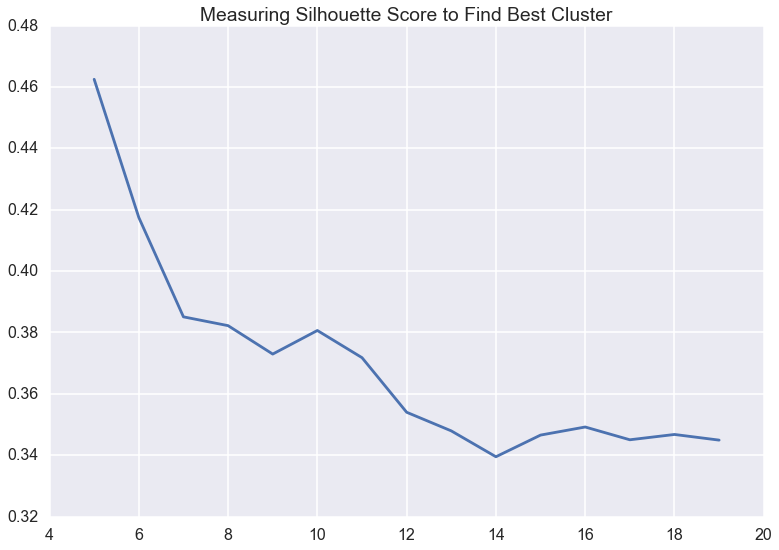

In [14]:
find_best_cluster(LDA_reduced_df,5,20)

### KMeans Clustering

In [15]:
kmeans = kmeans(LDA_reduced_df, 8)

In [16]:
# Assign labels
data['Cluster'] = kmeans['labels']

# Print silhouette score
print "silhouette score:", kmeans['silhouette_score']

silhouette score: 0.382217871678


#### Visualize the Scatter Plot

In [17]:
# Target labels
y = kmeans['labels']
df = pd.DataFrame({'X1':LDA_reduced_df[:,0],'X2':LDA_reduced_df[:,1], 'labels':y})

# # Graph with Seaborn
# sns.set_context("poster", font_scale=1)
# graph = sns.lmplot('X1', 'X2', data=df, fit_reg=False, hue="labels", size=10, palette="deep", markers='s')

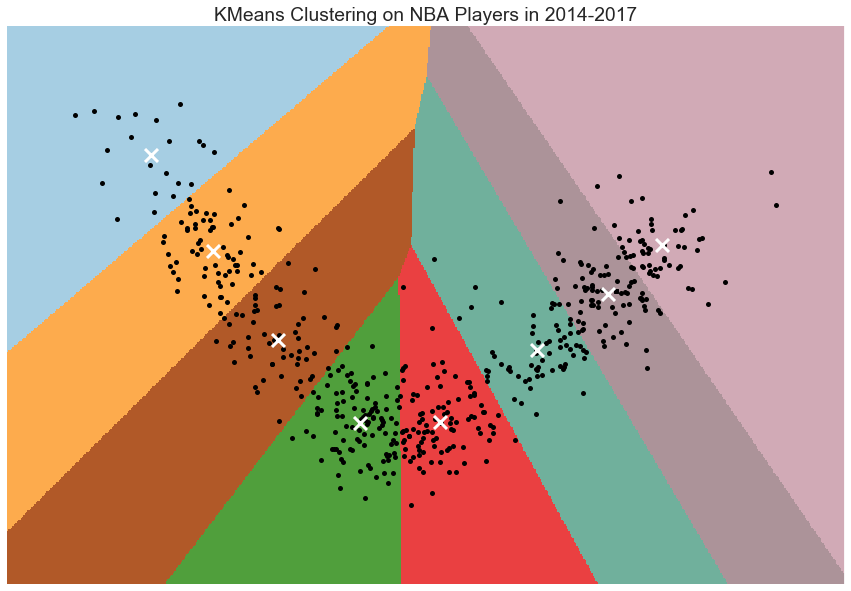

In [18]:
plot_kmeans_cluster(LDA_reduced_df, k_clusters=8, plot_title="""KMeans Clustering on NBA Players in 2014-2017""")

#### Investigate Clusters

In [19]:
data.head()

,Status,Player,Pos,Player_ID,url,G,PER,TS%,FTr,ORB%,...,TRB_100,AST_100,STL_100,BLK_100,TOV_100,PF_100,PTS_100,ORtg,DRtg,Cluster
0,Inactive,A.J. Price,PG,priceaj01,file:///Users/alexcheng/Downloads/us.sitesucke...,261,12.2,0.486,0.193,1.9,...,4.9,7.4,1.6,0.1,3.0,3.1,19.8,100,108,6
1,Active,Aaron Brooks,PG,brookaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,594,13.5,0.525,0.201,2.1,...,4.1,7.4,1.4,0.3,3.8,4.6,24.0,104,110,6
2,Active,Aaron Gordon,SF,gordoaa01,file:///Users/alexcheng/Downloads/us.sitesucke...,182,14.3,0.522,0.290,7.1,...,11.2,3.2,1.4,1.2,2.0,4.2,18.9,107,108,3
4,Active,Adreian Payne,PF,paynead01,file:///Users/alexcheng/Downloads/us.sitesucke...,96,7.4,0.444,0.215,6.4,...,11.3,2.4,1.5,0.9,3.3,7.2,15.1,87,110,3
5,Active,Al Horford,C,horfoal01,file:///Users/alexcheng/Downloads/us.sitesucke...,623,19.0,0.568,0.216,8.0,...,13.6,4.5,1.3,1.9,2.5,3.7,22.3,114,104,7


In [20]:
mask = (data['Cluster'] == 7)
data[mask][['Player']].head()

,Player
5,Al Horford
6,Al Jefferson
19,Amar'e Stoudemire
36,Anthony Davis
52,Blake Griffin


### Feature Importance for each Cluster

In [21]:
cluster_data = data[mask].drop(['Player', 'Pos', 'Cluster', 'url', 'Player_ID', 'Status'], axis=1)
league_data = data.drop(['Player', 'Pos', 'Cluster', 'url', 'Player_ID', 'Status'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

,Feature,Importance,Cluster Average,League Average
0,%FGA_0-3ft,0.213455,0.47137,0.335172
1,%FGA_DUNK,0.207810,0.14136,0.069234
2,2P%_100,0.179113,0.52728,0.485951
3,2P%,0.178917,0.52729,0.485967
4,PF_100,0.172278,5.82200,4.760512
5,FG%_100,0.170443,0.51155,0.454481
6,FG%,0.169973,0.51158,0.454477
7,ORtg,0.158227,111.68000,106.213894
8,%ASTd_2P,0.147013,0.68484,0.537998
9,TS%,0.136499,0.55599,0.533362


### Cluster Descriptions
- Cluster 0: Defensive Centers
- Cluster 1: 3-and-D Wings
- Cluster 2: Scoring Wings
- Cluster 3: Versatile Forwards
- Cluster 4: Floor Generals
- Cluster 5: Shooting Wings
- Cluster 6: Combo Guards
- Cluster 7: Offensive Centers

### Save to CSV

In [22]:
player_list = list(data['Player'])
status_list = list(data['Status'])
playerid_list = list(data['Player_ID'])
url_list = list(data['url'])

In [23]:
df['Player'] = player_list
df['Status'] = status_list
df['Player_ID'] = playerid_list
df['url'] = url_list
df['labels'] = df['labels'].map({0: 'Defensive Centers',
                                 1: '3-and-D Wings',
                                 2: 'Scoring Wings',
                                 3: 'Versatile Forwards',
                                 4: 'Floor Generals',
                                 5: 'Shooting Wings',
                                 6: 'Combo Guards',
                                 7: 'Offensive Centers'})

df.head()

,X1,X2,labels,Player,Status,Player_ID,url
0,-3.721358,0.734826,Combo Guards,A.J. Price,Inactive,priceaj01,file:///Users/alexcheng/Downloads/us.sitesucke...
1,-3.382158,1.127596,Combo Guards,Aaron Brooks,Active,brookaa01,file:///Users/alexcheng/Downloads/us.sitesucke...
2,0.532340,-0.575657,Versatile Forwards,Aaron Gordon,Active,gordoaa01,file:///Users/alexcheng/Downloads/us.sitesucke...
3,1.502679,0.146058,Versatile Forwards,Adreian Payne,Active,paynead01,file:///Users/alexcheng/Downloads/us.sitesucke...
4,2.351004,0.469768,Offensive Centers,Al Horford,Active,horfoal01,file:///Users/alexcheng/Downloads/us.sitesucke...


In [24]:
file1_loc = "data/positions_14-17.csv"

df.to_csv(file1_loc)